In [ ]:
#Author: Spence Johnston
#Class: Python for AI


#needed to utilize more than 10% of GPU RAM
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.99
session = InteractiveSession(config=config)

In [ ]:
#fix images for dataset

In [ ]:
#remove spaces in file names. copy files to new directory
import os
import shutil

def replace_char_in_filename(filename, old_char, new_char):
    return filename.replace(old_char, new_char)

def copy_and_rename_folders(source_path, dest_path, keyword):
    # Ensure the destination path exists
    os.makedirs(dest_path, exist_ok=True)

    # Iterate over the folders in the source path
    for folder_name in os.listdir(source_path):
        folder_path = os.path.join(source_path, folder_name)
        
        # Check if the current item is a directory and contains the keyword
        if os.path.isdir(folder_path) and keyword in folder_name:
            # Create the new destination folder path
            new_folder_path = os.path.join(dest_path, folder_name)
            os.makedirs(new_folder_path, exist_ok=True)

            # Iterate over the files in the current folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                # Check if the current item is a file
                if os.path.isfile(file_path):
                    # Create the new file name and path with character replacement
                    new_file_name = replace_char_in_filename(file_name, ' ', '')
                    new_file_name = replace_char_in_filename(new_file_name, '(', '')
                    new_file_name = replace_char_in_filename(new_file_name, ')', '')
                    new_file_path = os.path.join(new_folder_path, new_file_name)

                    # Copy and rename the file
                    shutil.copy2(file_path, new_file_path)

source_path = '/mnt/c/school/PythonAI/hw/final/plant_dataset/plant_dataset/Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation'

dest_path = "/home/spence/pythonforAI_hw/final/dataset"
keyword = "Tomato"

copy_and_rename_folders(source_path, dest_path, keyword)

In [ ]:
#remove 'tomato___' in file directory names for easier classifications 
import os

def rename_folders_in_path(path, string_to_remove):
    # Iterate over the folders in the given path
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        
        # Check if the current item is a directory
        if os.path.isdir(folder_path):
            # Remove the specified string from the folder name
            new_folder_name = folder_name.replace(string_to_remove, '')
            new_folder_path = os.path.join(path, new_folder_name)

            # Rename the folder
            os.rename(folder_path, new_folder_path)

path = "/home/spence/pythonforAI_hw/final/dataset"
string_to_remove = 'Tomato___'

rename_folders_in_path(path, string_to_remove)

In [4]:
#rename files so that they hold categories in names from parent folder
import os

def rename_files(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        parent_folder_name = os.path.basename(dirpath)

    for filename in filenames:
        new_filename = filename.replace('image', parent_folder_name + '.')
        old_file = os.path.join(dirpath, filename)
        new_file = os.path.join(dirpath, new_filename)
        os.rename(old_file, new_file)

def rename_files_in_many_folders(parent_folder):
    for subdir in os.listdir(parent_folder):
        subdir_path = os.path.join(parent_folder, subdir)
        rename_files(subdir_path)
    
parent_folder = "/home/spence/pythonforAI_hw/final/dataset"

rename_files_in_many_folders(parent_folder)

In [ ]:
#copy all photos into a single folder
import os
import shutil

def copy_files_to_single_folder(source_parent_folder, destination_folder):
    # Ensure the destination folder exists
    os.makedirs(destination_folder, exist_ok=True)

    # Walk through the parent folder
    for root, dirs, files in os.walk(source_parent_folder):
        for file in files:
            # Construct full file path
            file_path = os.path.join(root, file)
            # Copy each file to the destination folder
            shutil.copy(file_path, destination_folder)

# Define the source parent folder and the destination folder
source_parent_folder = "/home/spence/pythonforAI_hw/final/dataset"
destination_folder = "/home/spence/pythonforAI_hw/final/all_images"

copy_files_to_single_folder(source_parent_folder, destination_folder)

In [ ]:
#remove all category images that are numbered above 1000. needed for memory constraints
import os

def remove_images_with_numbers_greater_than(directory, threshold):
    # List all files in the directory
    files = os.listdir(directory)
    
    # Iterate over each file
    for filename in files:
        # Extract the number from the filename
        number_str = ''.join(filter(str.isdigit, filename))
        if number_str:  # Check if there is a number in the filename
            number = int(number_str)
            if number > threshold:
                # Delete the file
                os.remove(os.path.join(directory, filename))
                print(f"Removed: {filename}")

directory_path = "/home/spence/pythonforAI_hw/final/all_images"
remove_images_with_numbers_greater_than(directory_path, 1000)

In [ ]:
#create dataset below

In [2]:
#create labels and numpy imgs from image names
import os
import numpy as np
from PIL import Image

def create_dataset(directory):
    # List to store labels
    labels = []
    images = []
    
    # Iterate over the files in the directory
    for filename in os.listdir(directory):
        # Extract the first part of the file name (before the first dot)
        label = filename.split('.')[0]
        labels.append(label)
         #make sure images are 256x256
        image = Image.open(directory + '/'  + filename)
        if image.size != (256, 256):
            image = image.resize((256,256), resample=Image.BILINEAR)
        #create numpy array from img
        images.append(np.array(image))
    #output data set as labels and imgs
    return labels, images

directory_path = "/home/spence/pythonforAI_hw/final/all_images"
dataset = create_dataset(directory_path)

In [3]:
#one hot encode labels
from sklearn.preprocessing import LabelEncoder

#convert labels to ints
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(dataset[0])

#one-hot encode labels
from keras.utils import to_categorical
categorical_labels = to_categorical(integer_labels)

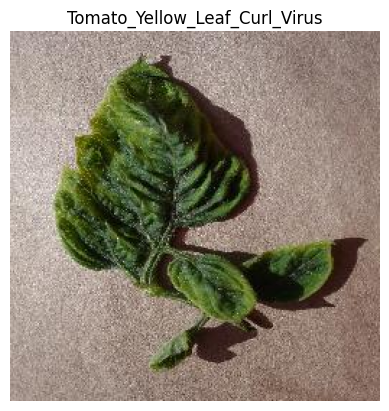

In [4]:
#make sure images are still valid
import matplotlib.pyplot as plt

plt.imshow(dataset[1][1])
plt.title(dataset[0][1])
plt.axis('off')
plt.show()

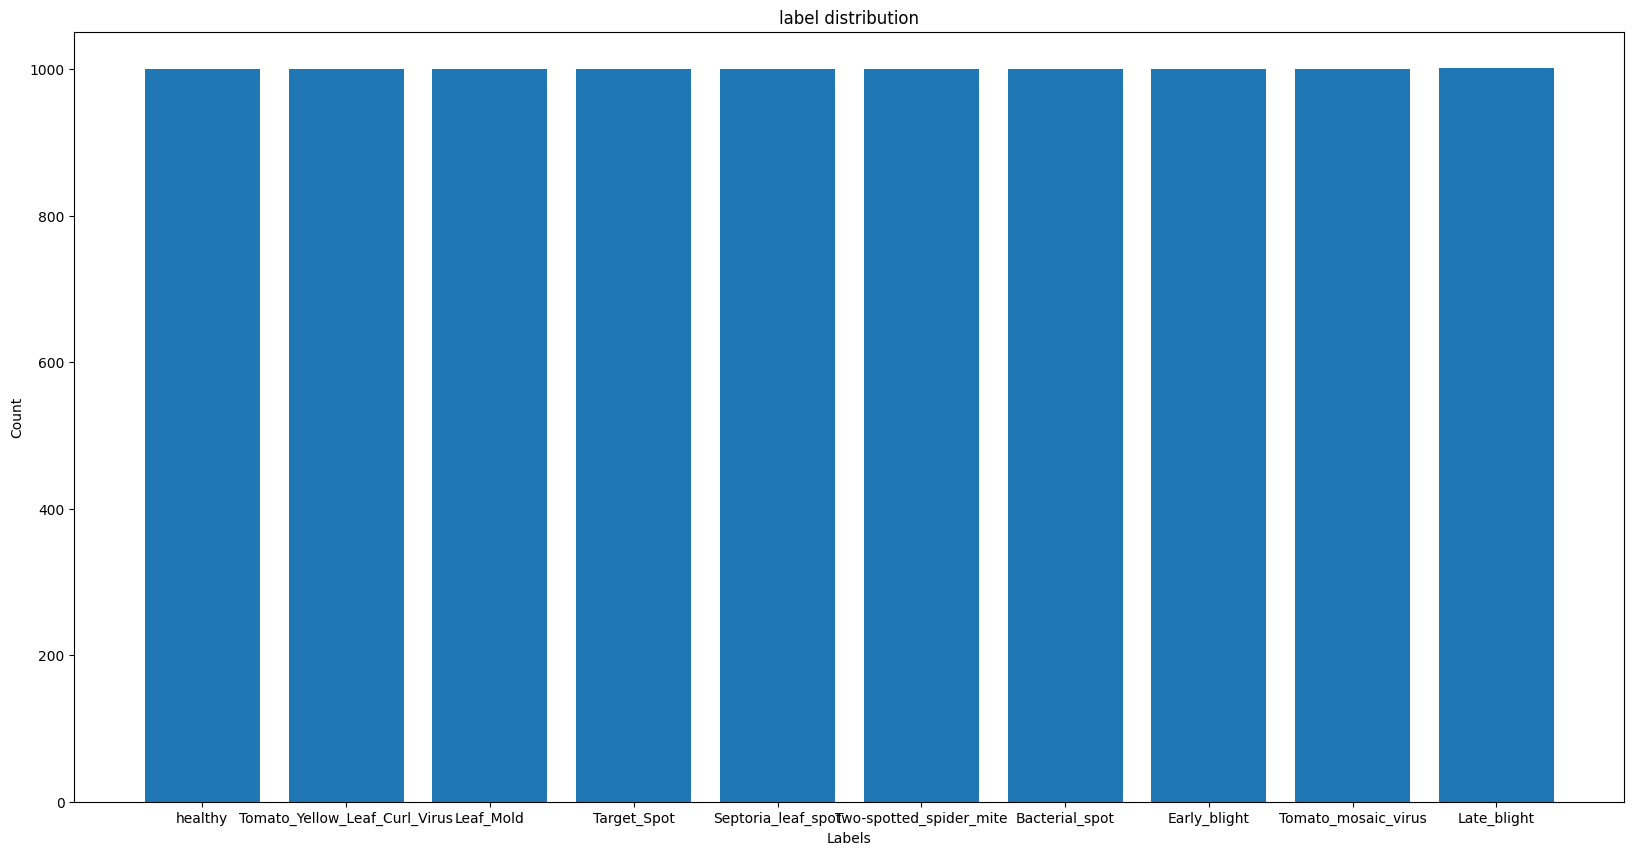

In [5]:
#plot distribution of labels
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(dataset[0])
plt.figure(figsize=(20,10))
plt.bar(counter.keys(), counter.values())
plt.title("label distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


In [4]:
#split data
#stratify to keep category distribution
import numpy as np
from sklearn.model_selection import train_test_split

images = dataset[1]

#split data set into testing and training
train_images, test_images, train_labels, test_labels = train_test_split(images, categorical_labels, test_size=0.2, stratify=integer_labels, random_state=69)

train_images = np.array(train_images)
test_images = np.array(test_images)



In [ ]:
#construct NN

In [ ]:
from keras.applications import VGG16
import tensorflow as tf
import numpy as np
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze the base model

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [6]:
#configure loss function, optimizer and metrics
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-4), metrics=['categorical_accuracy'])

In [ ]:

model.fit(train_images, train_labels, epochs=10, batch_size=10)

In [8]:
#evaluate model
model.evaluate(test_images, test_labels, batch_size=10)

2024-06-03 21:27:51.688901: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 393412608 exceeds 10% of free system memory.
2024-06-03 21:27:52.158346: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 393412608 exceeds 10% of free system memory.


201/201 [==============================] - 15s 73ms/step - loss: 0.5085 - categorical_accuracy: 0.9065


[0.5085487961769104, 0.9065467119216919]

In [16]:
label_names = label_encoder.classes_
label_names


array(['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold',
       'Septoria_leaf_spot', 'Target_Spot',
       'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus',
       'Two-spotted_spider_mite', 'healthy'], dtype='<U29')

In [13]:
#make predictions on test dataset
test_labels_integer = np.argmax(test_labels, axis=1)

predictions = np.argmax(model.predict(test_images), axis=-1)
#generate confusion matrix
confusion_mtx = tf.math.confusion_matrix(test_labels_integer, predictions)

63/63 [==============================] - 11s 170ms/step


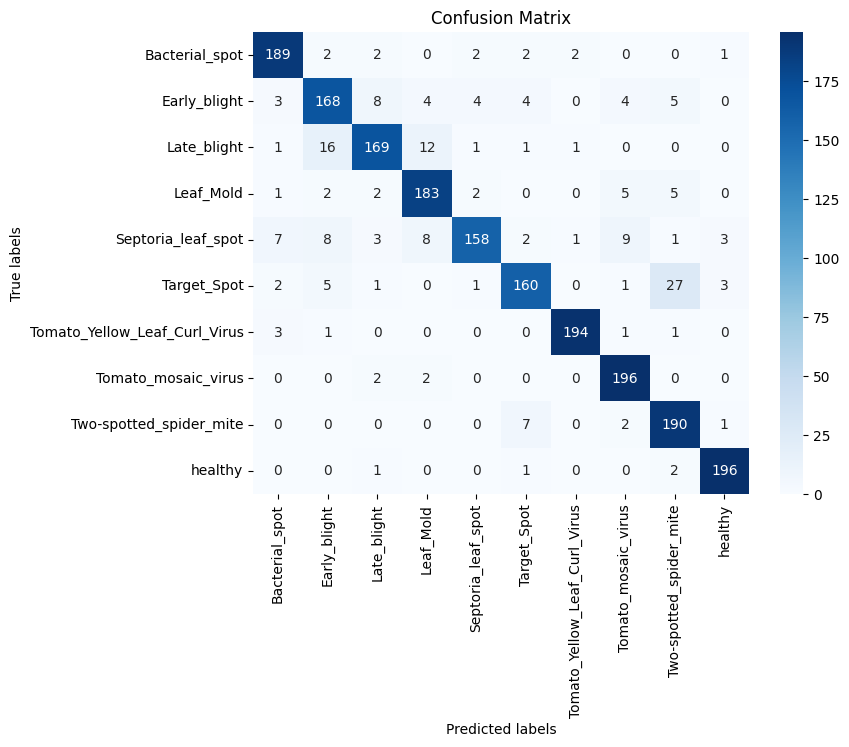

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()